## 一、数据拆分

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
table = pd.read_excel('护腰枕品牌数据2016-2017.xlsx')

In [12]:
table['年月'] = pd.to_datetime(table['年月'])

In [17]:
table1 = table.set_index('年月')

In [22]:
# 获取16年的数据
table1.loc['2016-1']

,名称,成交量,销售额指数,高质宝贝数,属性,数据类别,类目
年月,,,,,,,
2016-01-01,joyourbaby/佳韵宝,10073,5340394,22,NaN,品牌数据,护腰枕
2016-01-01,慧鸿佳世,8858,5076721,5,NaN,品牌数据,护腰枕
2016-01-01,嘻嘻兔,6766,1508933,4,NaN,品牌数据,护腰枕
2016-01-01,carebon/可宝,4075,1214350,2,NaN,品牌数据,护腰枕
2016-01-01,枕工坊,3635,1429847,25,NaN,品牌数据,护腰枕
2016-01-01,moon light love/月光之恋,3514,1624040,4,NaN,品牌数据,护腰枕
2016-01-01,warm hug,2967,651266,4,NaN,品牌数据,护腰枕
2016-01-01,艾儿妈妈,2052,571943,17,NaN,品牌数据,护腰枕
2016-01-01,咕呗,2003,992236,5,NaN,品牌数据,护腰枕


### 1.写入两个不同文件

In [23]:
data_2016 = table1.loc['2016']
data_2017 = table1.loc['2017']

In [25]:
data_2016.to_excel('data2016.xlsx')
data_2017.to_excel('data2017.xlsx')

### 2.写入不同文件夹

In [26]:
import os

In [28]:
os.listdir('./')

['.ipynb_checkpoints',
 'day4-数分集训营.pptx',
 '护腰枕品牌数据2016-2017.xlsx',
 '销量分析.ipynb']

In [39]:
def write_to_excel(path, file_name, data):
    if not os.path.exists(path):
        os.makedirs(path)
    fpath = os.path.join(path,file_name)
    data.to_excel(fpath)

In [40]:
write_to_excel('2017年','data2017.xlsx',data_2017)

In [51]:
f'data{year}.xlsx'

'data2017.xlsx'

In [53]:
for year in ['2016','2017']:
    data = table1.loc[year]
    path = year + '年'
    file_name = f'data{year}.xlsx'
    write_to_excel(path, file_name, data)

## 二、数据汇总

### 1.分别汇总16年和17年数据

In [54]:
os.listdir('./')

['.ipynb_checkpoints',
 '2016年',
 '2017年',
 'day4-数分集训营.pptx',
 '护腰枕品牌数据2016-2017.xlsx',
 '销量分析.ipynb']

In [60]:
files = []

for root, dirs, filenames in os.walk('./'):
    if root in ['./2016年', './2017年']:
        for filename in filenames:
            fpath = os.path.join(root,filename)
            temp_table = pd.read_excel(fpath)
            files.append(temp_table)

In [64]:
total = pd.concat(files)

total.to_excel('汇总表.xlsx')

## 三、数据分析

### 1.销量分析

2017年数据分析

In [67]:
table1 = total.set_index('年月')

In [71]:
table1.head()

,名称,成交量,销售额指数,高质宝贝数,属性,数据类别,类目
年月,,,,,,,
2016-01-01,joyourbaby/佳韵宝,10073,5340394,22,NaN,品牌数据,护腰枕
2016-01-01,慧鸿佳世,8858,5076721,5,NaN,品牌数据,护腰枕
2016-01-01,嘻嘻兔,6766,1508933,4,NaN,品牌数据,护腰枕
2016-01-01,carebon/可宝,4075,1214350,2,NaN,品牌数据,护腰枕
2016-01-01,枕工坊,3635,1429847,25,NaN,品牌数据,护腰枕


In [79]:
table1.resample('M')['成交量'].sum()

年月
2016-01-31     58393
2016-02-29     52262
2016-03-31    116716
2016-04-30    102042
2016-05-31    125258
2016-06-30    128914
2016-07-31    139468
2016-08-31    144899
2016-09-30    116581
2016-10-31     88504
2016-11-30     63346
2016-12-31     69792
2017-01-31     55073
2017-02-28    104726
2017-03-31    101631
2017-04-30    101760
2017-05-31    131039
2017-06-30    191361
2017-07-31    193673
2017-08-31    185764
2017-09-30    146840
2017-10-31    129398
2017-11-30     94659
2017-12-31    114573
Freq: M, Name: 成交量, dtype: int64

In [80]:
data1 = table1.groupby('名称')['成交量'].sum()

In [81]:
data1.head()

名称
alpremio（韩国）        719
babybright        49526
bearmami/倍爱妈咪       402
beimily/蓓美妮       33843
carebon/可宝       101669
Name: 成交量, dtype: int64

In [86]:
plt.rcParams['font.sans-serif'] = 'SimHei'

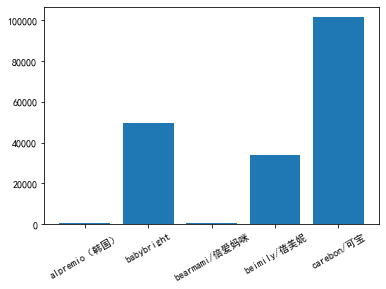

In [92]:
plt.bar(x=data1.head().index, height=data1.head().values)
_ = plt.xticks(rotation=30)

<AxesSubplot:xlabel='成交量', ylabel='名称'>

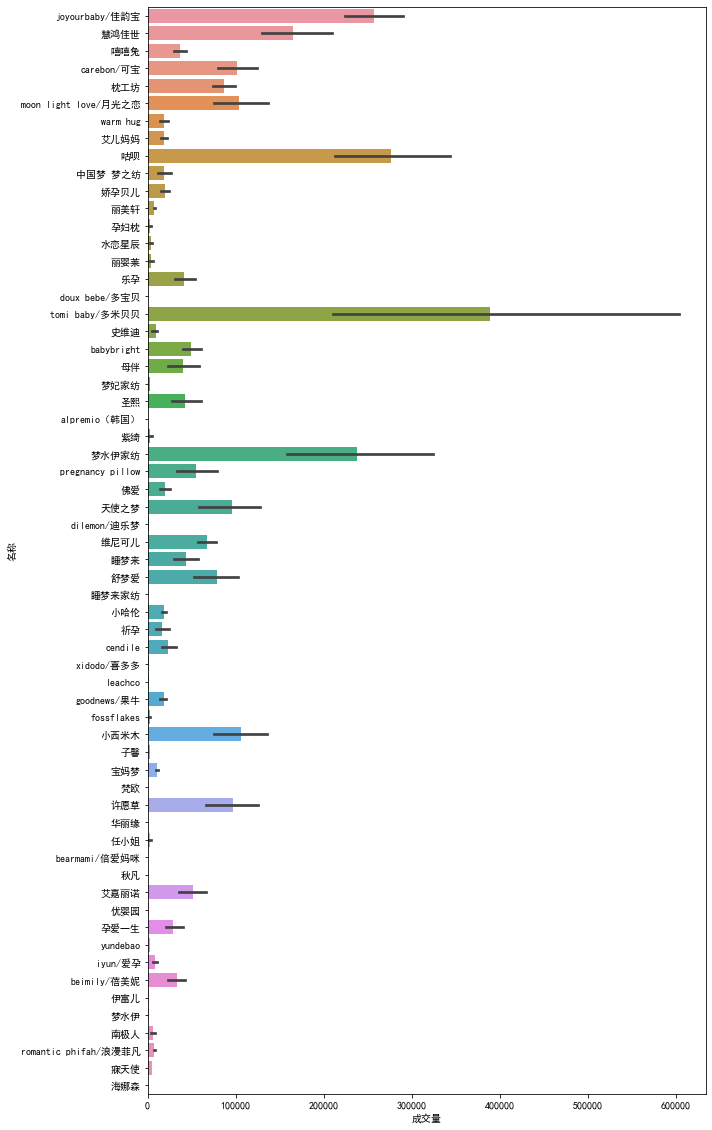

In [96]:
plt.figure(figsize=(10, 20))
sns.barplot(x='成交量',y='名称', estimator=sum, data=table1)

#### 月销量分析

In [97]:
data2016 = table1.loc['2016']
data2016

,名称,成交量,销售额指数,高质宝贝数,属性,数据类别,类目
年月,,,,,,,
2016-01-01,joyourbaby/佳韵宝,10073,5340394,22,NaN,品牌数据,护腰枕
2016-01-01,慧鸿佳世,8858,5076721,5,NaN,品牌数据,护腰枕
2016-01-01,嘻嘻兔,6766,1508933,4,NaN,品牌数据,护腰枕
2016-01-01,carebon/可宝,4075,1214350,2,NaN,品牌数据,护腰枕
2016-01-01,枕工坊,3635,1429847,25,NaN,品牌数据,护腰枕
...,...,...,...,...,...,...,...
2016-12-01,cendile,1376,516733,7,NaN,品牌数据,护腰枕
2016-12-01,圣熙,1352,424478,6,NaN,品牌数据,护腰枕
2016-12-01,华丽缘,1007,378156,3,NaN,品牌数据,护腰枕


<AxesSubplot:xlabel='年月'>

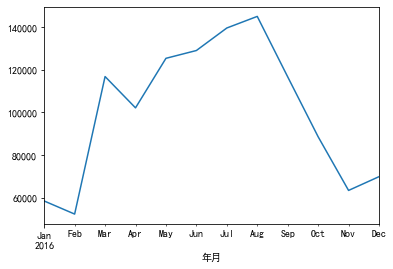

In [100]:
data2016.resample('M')['成交量'].sum().plot(kind='line')

#### 各产品总销量分析

<AxesSubplot:ylabel='成交量'>

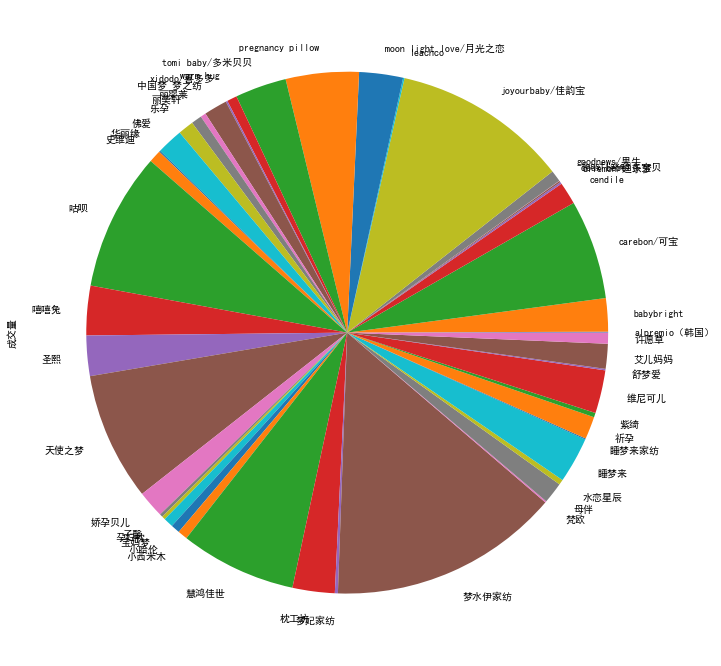

In [105]:
plt.figure(figsize=(12,12))
data2016.groupby('名称')['成交量'].sum().plot(kind='pie')

#### 各产品销量占比分析

#### Top5商品销售趋势分析

In [119]:
temp = data2016.sort_values('成交量',ascending=False).head(5)[['名称','成交量']]

<BarContainer object of 5 artists>

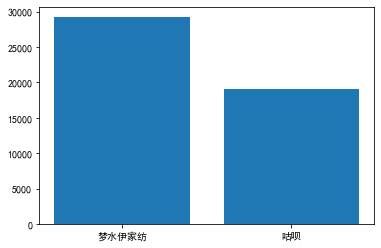

In [120]:
plt.bar(x=temp['名称'], height=temp['成交量'])

#### 月销量TOP10热力图分析

In [122]:
temp = pd.DataFrame(data=np.random.randint(0, 100, size=(10,10)))
temp

,0,1,2,3,4,5,6,7,8,9
0,98,26,82,12,18,8,80,54,37,7
1,97,85,17,64,49,46,89,41,31,81
2,27,54,52,74,50,31,96,96,7,80
3,36,31,92,86,38,62,72,17,10,41
4,64,43,44,63,22,55,83,14,11,41
5,84,85,72,79,73,63,45,46,53,78
6,34,91,98,65,11,11,14,47,39,55
7,5,56,97,11,46,96,89,97,92,15
8,37,99,36,22,11,43,77,89,37,81
9,80,79,89,53,69,7,71,2,88,98


<AxesSubplot:>

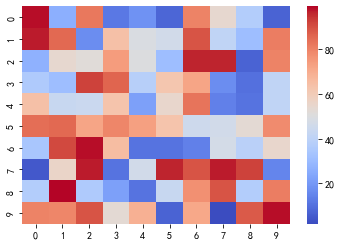

In [127]:
sns.heatmap(temp, cmap=plt.cm.coolwarm)

In [133]:
data2016.groupby('名称')['成交量'].sum().sort_values(ascending=False).head(10)

名称
梦水伊家纺               172386
joyourbaby/佳韵宝      131252
咕呗                  102924
天使之梦                 95684
慧鸿佳世                 86793
carebon/可宝           74295
pregnancy pillow     54559
tomi baby/多米贝贝       38385
嘻嘻兔                  36957
睡梦来                  34220
Name: 成交量, dtype: int64

In [138]:
data2016.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='年月', length=264)

In [139]:
data2016['月份'] = data2016.index.month

C:\Users\Dancer\AppData\Local\Temp/ipykernel_1684/2962418081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2016['月份'] = data2016.index.month


In [143]:
pivot_data = data2016.pivot_table(index='月份', columns='名称', values='成交量', fill_value=0)

<AxesSubplot:xlabel='名称', ylabel='月份'>

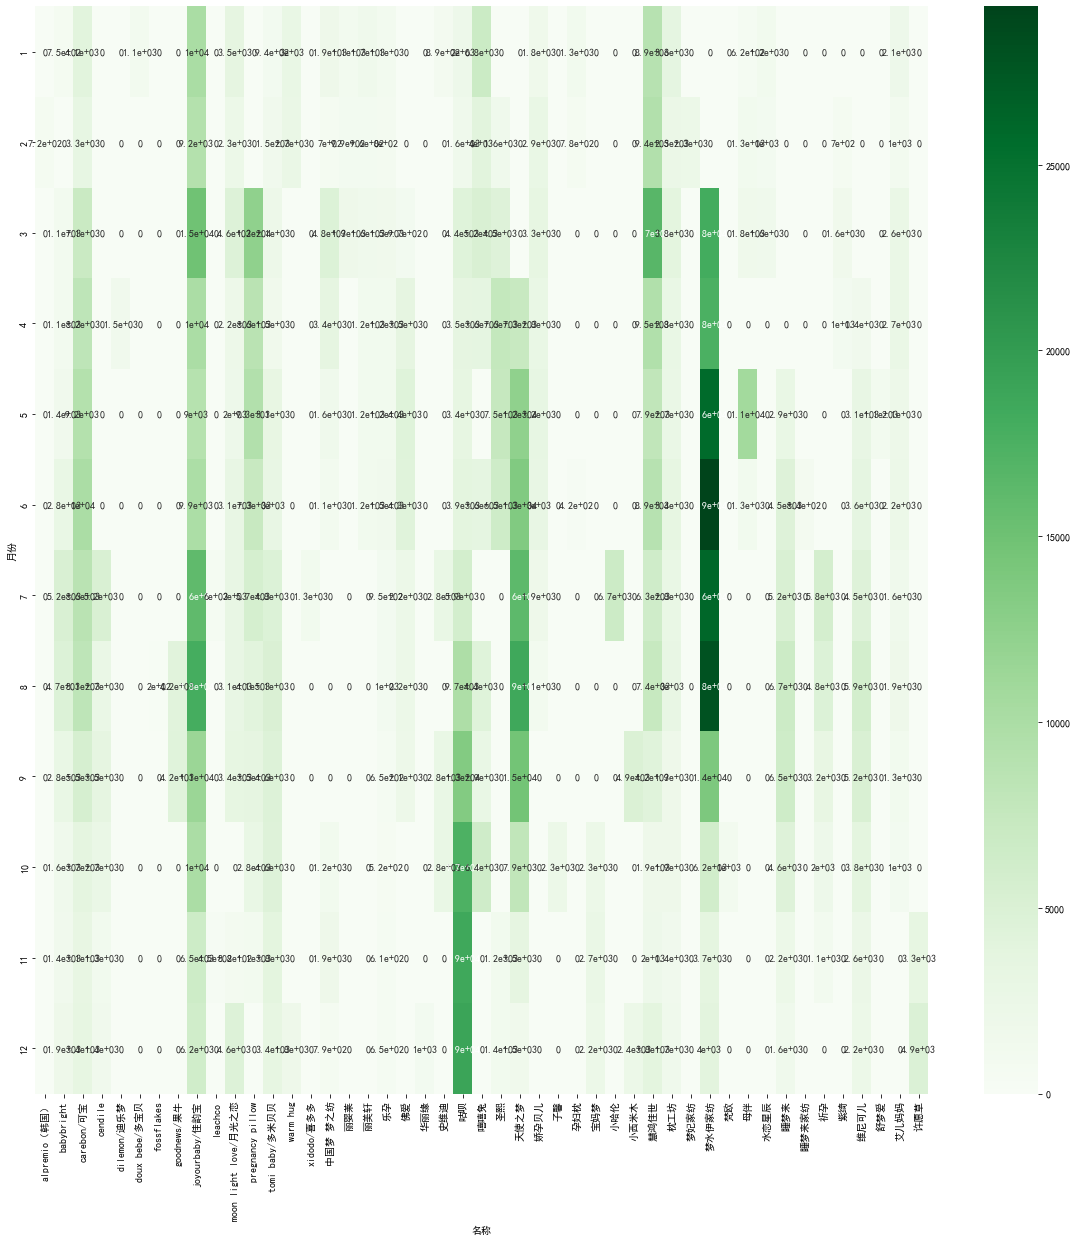

In [149]:
plt.figure(figsize=(20,20))
sns.heatmap(pivot_data, annot=True, cmap=plt.cm.Greens)